<a href="https://colab.research.google.com/github/Hilariordz/ECBD_Error404/blob/master/SHU4_An%C3%A1lisisNoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas sqlalchemy openpyxl requests gspread gdown

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import requests


In [2]:
!pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
from faker import Faker
import random
import datetime

fake = Faker()

NUM_RECORDS = 4000

STATUS_OPTIONS = ['Confirmado', 'Pendiente', 'Cancelado', 'No-mostar', 'CONFIRMADO', 'confirmado', 'cancelado', 'Pendiente ', ' Confirmado']
PLATFORM_OPTIONS = ['Sitio', 'Telegono', 'Aplicacion', 'En-linea', 'Llamada', 'Aplicacion-movil', ' sitioweb', 'telefono']
TIME_FORMATS = ['%H:%M', '%I:%M %p', '%H:%M:%S']
DATE_FORMATS = ['%Y-%m-%d', '%d/%m/%Y', '%m-%d-%Y', '%d-%b-%Y']
BAD_EMAIL_SUFFIXES = ['@example', '.com', '@.com', '@email..com']

def introduce_dirt(record):

    if random.random() < 0.1: record['Correo'] = ''
    if random.random() < 0.15: record['Numero'] = None
    if random.random() < 0.2: record['Especificaciones'] = ''

    if random.random() < 0.05: record['Nombre'] = record['Nombre'].replace(random.choice(record['Nombre']), '')
    if random.random() < 0.05: record['Apellido'] = record['Apellido'].lower()

    record['DiaReservacion'] = record['DiaReservacion'].strftime(random.choice(DATE_FORMATS))
    record['HoraReservacion'] = record['HoraReservacion'].strftime(random.choice(TIME_FORMATS))

    if record['Numero']:
        phone = str(record['Numero'])
        if random.random() < 0.3: record['Numero'] = f"({phone[:3]}) {phone[3:6]}-{phone[6:]}"
        elif random.random() < 0.3: record['Numero'] = f"{phone[:3]}-{phone[3:6]}-{phone[6:]}"

    if record['Correo'] and random.random() < 0.1:
        record['Correo'] = record['Correo'].split('@')[0] + random.choice(BAD_EMAIL_SUFFIXES)

    if random.random() < 0.02: record['NAsistentes'] = random.choice([0, 99, 100])

    if random.random() < 0.1: record['Especificaciones'] = f" {record['Especificaciones']} "

    return record

data = []
for i in range(1, NUM_RECORDS + 1):
    reservation_date = fake.date_between(start_date='-30d', end_date='+60d')
    reservation_time = datetime.time(random.randint(12, 22), random.choice([0, 15, 30, 45]))

    record = {
        'ReservacionID': i,
        'CustomerID': f'CUST{random.randint(1, NUM_RECORDS // 2)}', # Forzar duplicados de clientes
        'Nombre': fake.first_name(),
        'Apellido': fake.last_name(),
        'Correo': fake.email(),
        'Numero': fake.msisdn()[:10],
        'DiaReservacion': reservation_date,
        'HoraReservacion': reservation_time,
        'NAsistentes': random.randint(1, 10),
        'Especificaciones': fake.sentence(nb_words=5) if random.random() > 0.5 else '',
        'Mesa': random.randint(1, 30),
        'Estado': random.choice(STATUS_OPTIONS),
        'PlataformaReserva': random.choice(PLATFORM_OPTIONS)
    }

    dirty_record = introduce_dirt(record)
    data.append(dirty_record)

for _ in range(int(NUM_RECORDS * 0.05)):
    data.append(random.choice(data))

df = pd.DataFrame(data)

file_name = 'reservaciones.csv'
df.to_csv(file_name, index=False, encoding='utf-8')

print(f"¡Éxito! Se ha creado el archivo '{file_name}' con {len(data)} registros.")

¡Éxito! Se ha creado el archivo 'reservaciones.csv' con 4200 registros.


In [4]:
import os

os.listdir('/content')


['.config', 'reservaciones.csv', 'sample_data']

In [5]:
import pandas as pd

df = pd.read_csv('/content/reservaciones.csv', encoding='utf-8', on_bad_lines='skip')

df.head()


,ReservacionID,CustomerID,Nombre,Apellido,Correo,Numero,DiaReservacion,HoraReservacion,NAsistentes,Especificaciones,Mesa,Estado,PlataformaReserva
0,1,CUST1973,Seth,Tran,johnhiggins@example.org,NaN,31/12/2025,13:00:00,3,Where wish discover recently imagine either.,25,CONFIRMADO,Aplicacion-movil
1,2,CUST598,Mark,Garcia,randywilliams@example.org,2215330779,2025-12-18,21:00,4,Statement few out huge game.,15,Cancelado,Aplicacion-movil
2,3,CUST555,Sarah,Kelly,tward@example.org,NaN,12-21-2025,19:45,2,NaN,27,Confirmado,En-linea
3,4,CUST550,Timothy,Whitehead,johnryan@example.net,7408013395,2025-11-29,15:30,6,Expect bed road particular part.,14,Confirmado,Sitio
4,5,CUST99,Laura,Cole,johnsondaniel@example.org,976-372-0287,01-01-2026,05:30 PM,2,NaN,6,cancelado,sitioweb


In [6]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ReservacionID      4200 non-null   int64 
 1   CustomerID         4200 non-null   object
 2   Nombre             4200 non-null   object
 3   Apellido           4200 non-null   object
 4   Correo             3778 non-null   object
 5   Numero             3608 non-null   object
 6   DiaReservacion     4200 non-null   object
 7   HoraReservacion    4200 non-null   object
 8   NAsistentes        4200 non-null   int64 
 9   Especificaciones   1980 non-null   object
 10  Mesa               4200 non-null   int64 
 11  Estado             4200 non-null   object
 12  PlataformaReserva  4200 non-null   object
dtypes: int64(3), object(10)
memory usage: 426.7+ KB


,0
ReservacionID,0
CustomerID,0
Nombre,0
Apellido,0
Correo,422
Numero,592
DiaReservacion,0
HoraReservacion,0
NAsistentes,0
Especificaciones,2220


In [ ]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('reservaciones.csv')
    print("Dataset cargado exitosamente.")
    print(f"Número de registros iniciales: {len(df)}")
except FileNotFoundError:
    print("El archivo 'reservaciones.csv' no se encontró. Asegúrate de que esté en la misma carpeta.")
    exit()

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("\n Iniciando proceso de limpieza y transformación...")

df.drop_duplicates(inplace=True)

df['nombre'] = df['nombre'].str.strip().str.title()
df['apellido'] = df['apellido'].str.strip().str.title()

df['correo'] = df['correo'].str.strip().str.lower()
df['correo'].fillna('no_proporcionado', inplace=True)

df['correo_valido'] = df['correo'].apply(lambda x: True if '@' in x and '.' in x.split('@')[1] else False)

df['numero'] = df['numero'].astype(str).str.replace(r'\D', '', regex=True)
df['numero'].replace('nan', 'no_proporcionado', inplace=True)

estado_map = {
    'confirmado': 'Confirmado', 'pendiente': 'Pendiente', 'cancelado': 'Cancelado',
    'no-mostar': 'No Presentado', 'no-presentado': 'No Presentado',
    'pendiente ': 'Pendiente', ' confirmado': 'Confirmado'
}
plataforma_map = {
    'sitio': 'Sitio Web', 'telegono': 'Teléfono', 'aplicacion': 'App',
    'en-linea': 'Sitio Web', 'llamada': 'Teléfono', 'aplicacion-movil': 'App',
    ' sitioweb': 'Sitio Web', 'telefono': 'Teléfono'
}
df['estado'] = df['estado'].str.strip().str.lower().map(estado_map).fillna('Desconocido')
df['plataformareserva'] = df['plataformareserva'].str.strip().str.lower().map(plataforma_map).fillna('Otra')

df['fechahora_reservacion'] = pd.to_datetime(
    df['diareservacion'].astype(str) + ' ' + df['horareservacion'].astype(str),
    errors='coerce'
)
df.dropna(subset=['fechahora_reservacion'], inplace=True)
df.drop(['diareservacion', 'horareservacion'], axis=1, inplace=True)

df['nasistentes'] = pd.to_numeric(df['nasistentes'], errors='coerce')
df.loc[(df['nasistentes'] <= 0) | (df['nasistentes'] > 20), 'nasistentes'] = np.nan
median_asistentes = df['nasistentes'].median()
df['nasistentes'].fillna(median_asistentes, inplace=True)
df['nasistentes'] = df['nasistentes'].astype(int)

df['especificaciones'].fillna('Ninguna', inplace=True)

df.sort_values(by='fechahora_reservacion', ascending=True, inplace=True)

columnas_finales = [
    'reservacionid', 'customerid', 'nombre', 'apellido', 'correo',
    'correo_valido', 'numero', 'fechahora_reservacion', 'nasistentes',
    'mesa', 'estado', 'plataformareserva', 'especificaciones'
]
df = df[columnas_finales]

print("¡Limpieza completada!")
print(f"Número de registros finales: {len(df)}")

output_filename = 'reservaciones_limpias.csv'
df.to_csv(output_filename, index=False, encoding='utf-8')
print(f"\n Dataset limpio guardado como '{output_filename}'.")

print("\nVista previa del dataset limpio:")
print(df.head())

In [8]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('reservaciones.csv')
    print("Dataset cargado exitosamente.")
    print(f"Número de registros iniciales: {len(df)}")
except FileNotFoundError:
    print("Error: El archivo 'reservaciones.csv' no se encontró. Asegúrate de que esté en la misma carpeta.")
    exit()

print("\n Iniciando proceso de limpieza y transformación...")

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.drop_duplicates(inplace=True)

df['nombre'] = df['nombre'].str.strip().str.title()
df['apellido'] = df['apellido'].str.strip().str.title()

df['correo'] = df['correo'].str.strip().str.lower()
df['correo'].fillna('no_proporcionado', inplace=True)
df['correo_valido'] = df['correo'].apply(lambda x: True if '@' in x and '.' in x.split('@')[1] else False)

df['numero'] = df['numero'].astype(str).str.replace(r'\D', '', regex=True)
df['numero'].replace('nan', 'no_proporcionado', inplace=True)

estado_map = {
    'confirmado': 'Confirmado', 'pendiente': 'Pendiente', 'cancelado': 'Cancelado',
    'no-mostar': 'No Presentado', 'no-presentado': 'No Presentado',
    'pendiente ': 'Pendiente', ' confirmado': 'Confirmado'
}
plataforma_map = {
    'sitio': 'Sitio Web', 'telegono': 'Teléfono', 'aplicacion': 'App',
    'en-linea': 'Sitio Web', 'llamada': 'Teléfono', 'aplicacion-movil': 'App',
    ' sitioweb': 'Sitio Web', 'telefono': 'Teléfono'
}
df['estado'] = df['estado'].str.strip().str.lower().map(estado_map).fillna('Desconocido')
df['plataformareserva'] = df['plataformareserva'].str.strip().str.lower().map(plataforma_map).fillna('Otra')

df['fechahora_reservacion'] = pd.to_datetime(
    df['diareservacion'].astype(str) + ' ' + df['horareservacion'].astype(str),
    errors='coerce'
)

df.drop(['diareservacion', 'horareservacion'], axis=1, inplace=True)

df['nasistentes'] = pd.to_numeric(df['nasistentes'], errors='coerce')
df.loc[(df['nasistentes'] <= 0) | (df['nasistentes'] > 20), 'nasistentes'] = np.nan
median_asistentes = df['nasistentes'].median()
df['nasistentes'].fillna(median_asistentes, inplace=True)
df['nasistentes'] = df['nasistentes'].astype(int)

df['especificaciones'].fillna('Ninguna', inplace=True)

df.sort_values(by='reservacionid', ascending=True, inplace=True)

columnas_finales = [
    'reservacionid', 'customerid', 'nombre', 'apellido', 'correo',
    'correo_valido', 'numero', 'fechahora_reservacion', 'nasistentes',
    'mesa', 'estado', 'plataformareserva', 'especificaciones'
]
df = df[columnas_finales]

print(" ¡Limpieza completada!")
print(f"Número de registros finales: {len(df)}")

output_filename = 'reservaciones_limpias_v2.csv'
df.to_csv(output_filename, index=False, encoding='utf-8')
print(f"\n Dataset limpio guardado como '{output_filename}'.")

print("\nVista previa del dataset limpio y ordenado por ID:")
print(df.head())

Dataset cargado exitosamente.
Número de registros iniciales: 4200

 Iniciando proceso de limpieza y transformación...


/tmp/ipython-input-2679529774.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['correo'].fillna('no_proporcionado', inplace=True)
/tmp/ipython-input-2679529774.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

 ¡Limpieza completada!
Número de registros finales: 4000

 Dataset limpio guardado como 'reservaciones_limpias_v2.csv'.

Vista previa del dataset limpio y ordenado por ID:
   reservacionid customerid   nombre   apellido                     correo  \
0              1   CUST1973     Seth       Tran    johnhiggins@example.org   
1              2    CUST598     Mark     Garcia  randywilliams@example.org   
2              3    CUST555    Sarah      Kelly          tward@example.org   
3              4    CUST550  Timothy  Whitehead       johnryan@example.net   
4              5     CUST99    Laura       Cole  johnsondaniel@example.org   

   correo_valido      numero fechahora_reservacion  nasistentes  mesa  \
0           True               2025-12-31 13:00:00            3    25   
1           True  2215330779                   NaT            4    15   
2           True                               NaT            2    27   
3           True  7408013395                   NaT            6    

/tmp/ipython-input-2679529774.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nasistentes'].fillna(median_asistentes, inplace=True)
/tmp/ipython-input-2679529774.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

try:
    df = pd.read_csv('reservaciones_limpias.csv')
except FileNotFoundError:
    print("Error: No se encontró 'reservaciones_limpias.csv'. Súbelo a Colab.")
    exit()

df['es_no_presentado'] = df['estado'].apply(lambda x: 1 if x == 'No Presentado' else 0)

df['fechahora_reservacion'] = pd.to_datetime(df['fechahora_reservacion'], errors='coerce')

df = df.dropna(subset=['fechahora_reservacion'])

df['dia_de_semana'] = df['fechahora_reservacion'].dt.dayofweek
df['hora_del_dia'] = df['fechahora_reservacion'].dt.hour
df['mes_del_anio'] = df['fechahora_reservacion'].dt.month

y = df['es_no_presentado']
X = df[['plataformareserva', 'nasistentes', 'mesa', 'dia_de_semana', 'hora_del_dia', 'mes_del_anio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Datos listos para el modelo:")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print("\nDistribución de la variable objetivo en el set de entrenamiento:")
print(y_train.value_counts(normalize=True))

Datos listos para el modelo:
Forma de X_train: (256, 6)
Forma de X_test: (64, 6)

Distribución de la variable objetivo en el set de entrenamiento:
es_no_presentado
0    0.882812
1    0.117188
Name: proportion, dtype: float64


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

categorical_features = ['plataformareserva']
numeric_features = ['nasistentes', 'mesa', 'dia_de_semana', 'hora_del_dia', 'mes_del_anio']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

print("\nEntrenando Regresión Logística...")
pipeline_lr.fit(X_train, y_train)
print("Modelo de Regresión Logística entrenado.")

print("\nEntrenando Random Forest...")
pipeline_rf.fit(X_train, y_train)
print("Modelo de Random Forest entrenado.")


Entrenando Regresión Logística...
Modelo de Regresión Logística entrenado.

Entrenando Random Forest...
Modelo de Random Forest entrenado.


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

print("\n--- Evaluación: Regresión Logística ---")
print(classification_report(y_test, y_pred_lr, target_names=['Se Presentará (0)', 'No Presentado (1)']))
print("Matriz de Confusión (Regresión Logística):")
print(confusion_matrix(y_test, y_pred_lr))

print("\n--- Evaluación: Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['Se Presentará (0)', 'No Presentado (1)']))
print("Matriz de Confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))


--- Evaluación: Regresión Logística ---
                   precision    recall  f1-score   support

Se Presentará (0)       0.88      1.00      0.93        56
No Presentado (1)       0.00      0.00      0.00         8

         accuracy                           0.88        64
        macro avg       0.44      0.50      0.47        64
     weighted avg       0.77      0.88      0.82        64

Matriz de Confusión (Regresión Logística):
[[56  0]
 [ 8  0]]

--- Evaluación: Random Forest ---
                   precision    recall  f1-score   support

Se Presentará (0)       0.87      0.98      0.92        56
No Presentado (1)       0.00      0.00      0.00         8

         accuracy                           0.86        64
        macro avg       0.44      0.49      0.46        64
     weighted avg       0.76      0.86      0.81        64

Matriz de Confusión (Random Forest):
[[55  1]
 [ 8  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


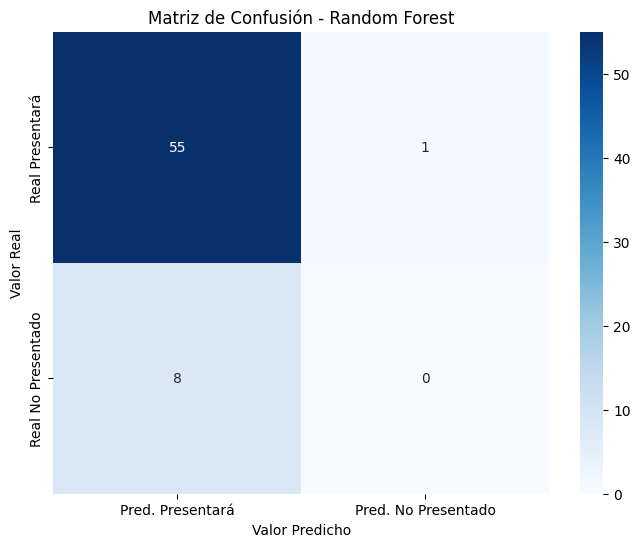

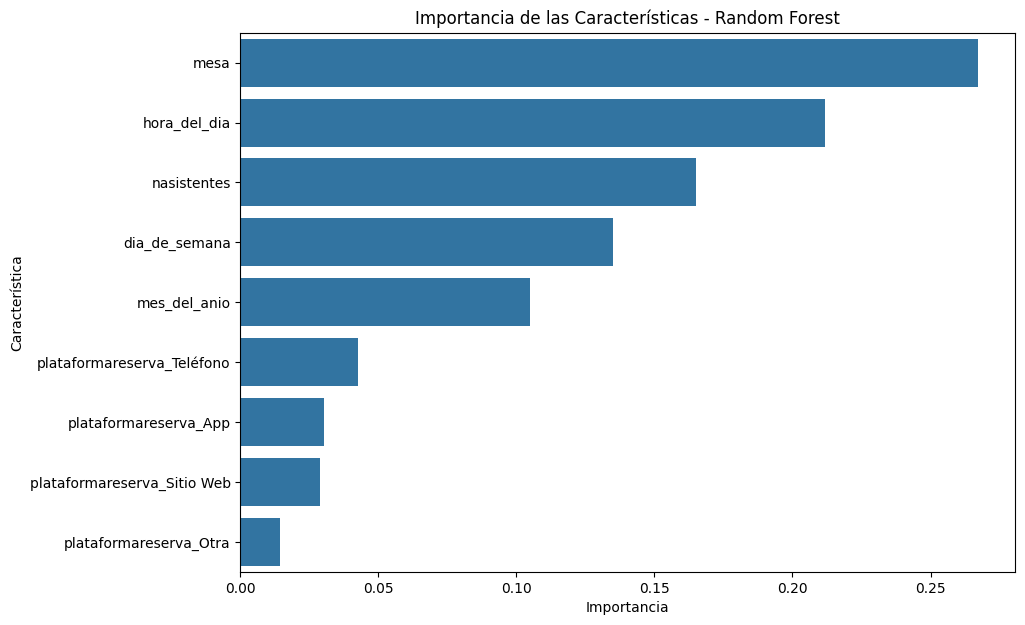

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred. Presentará', 'Pred. No Presentado'],
            yticklabels=['Real Presentará', 'Real No Presentado'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.savefig('matriz_confusion.png')
plt.show()

ohe_features = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(ohe_features)

importances = pipeline_rf.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importancia de las Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.savefig('importancia_caracteristicas.png')
plt.show()

Calculando número óptimo de clústeres...


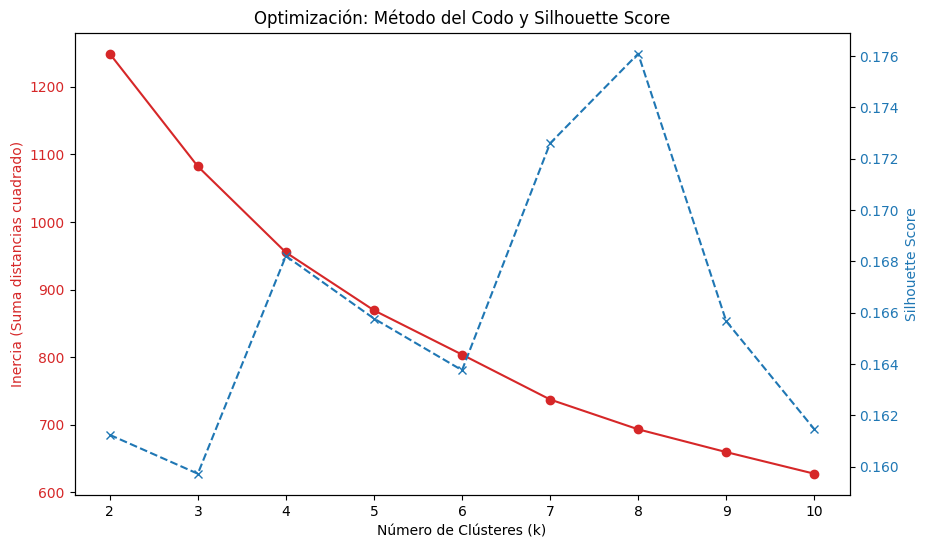


--- Evaluación del Modelo (K=3) ---
Silhouette Score: 0.1597 (Más cercano a 1 es mejor)
Davies-Bouldin Index: 1.8669 (Más cercano a 0 es mejor)


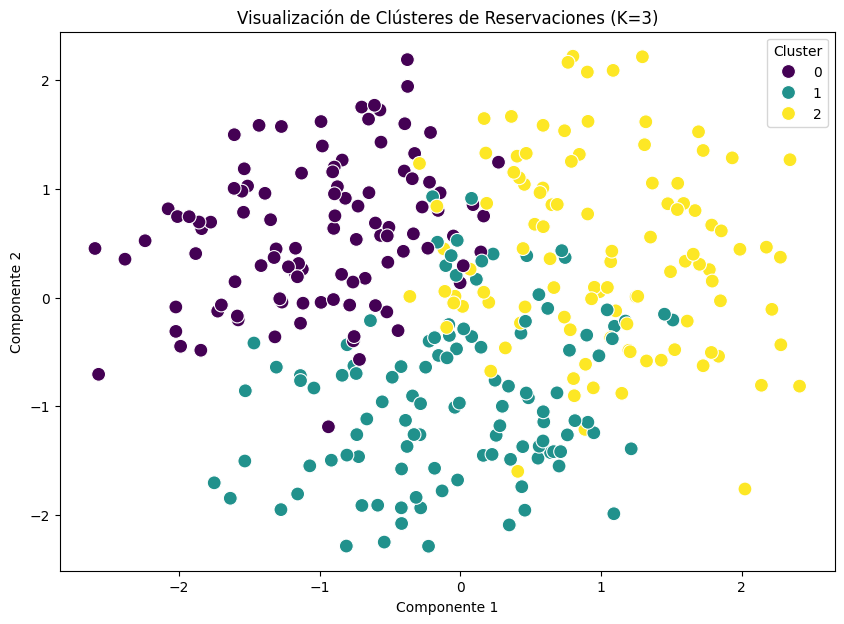


--- Perfil de los Grupos Encontrados (Promedios) ---
         nasistentes       mesa       hora  dia_semana
Cluster                                               
0           3.213592  21.320388  17.941748    3.417476
1           6.265487  10.486726  15.584071    4.495575
2           7.528846  13.490385  17.519231    1.250000

Archivo 'reservaciones_con_clusters.csv' guardado.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

try:
    df = pd.read_csv('reservaciones_limpias.csv')
except FileNotFoundError:
    print("Error: Sube el archivo 'reservaciones_limpias.csv'")
    exit()

df['fechahora_reservacion'] = pd.to_datetime(df['fechahora_reservacion'])
df['hora'] = df['fechahora_reservacion'].dt.hour
df['dia_semana'] = df['fechahora_reservacion'].dt.dayofweek

features_num = ['nasistentes', 'mesa', 'hora', 'dia_semana']
features_cat = ['plataformareserva']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_num),
        ('cat', OneHotEncoder(sparse_output=False), features_cat)
    ])

X_processed = preprocessor.fit_transform(df)

inertia = []
silhouette_scores = []
K_range = range(2, 11)

print("Calculando número óptimo de clústeres...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_processed, kmeans.labels_))

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Número de Clústeres (k)')
ax1.set_ylabel('Inercia (Suma distancias cuadrado)', color=color)
ax1.plot(K_range, inertia, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K_range, silhouette_scores, marker='x', color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Optimización: Método del Codo y Silhouette Score')
plt.show()

k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_processed)

df['Cluster'] = clusters

print(f"\n--- Evaluación del Modelo (K={k_optimo}) ---")
print(f"Silhouette Score: {silhouette_score(X_processed, clusters):.4f} (Más cercano a 1 es mejor)")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_processed, clusters):.4f} (Más cercano a 0 es mejor)")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

pca_df = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title(f'Visualización de Clústeres de Reservaciones (K={k_optimo})')
plt.show()

analisis_clusters = df.groupby('Cluster')[['nasistentes', 'mesa', 'hora', 'dia_semana']].mean()
print("\n--- Perfil de los Grupos Encontrados (Promedios) ---")
print(analisis_clusters)

df.to_csv('reservaciones_con_clusters.csv', index=False)
print("\nArchivo 'reservaciones_con_clusters.csv' guardado.")

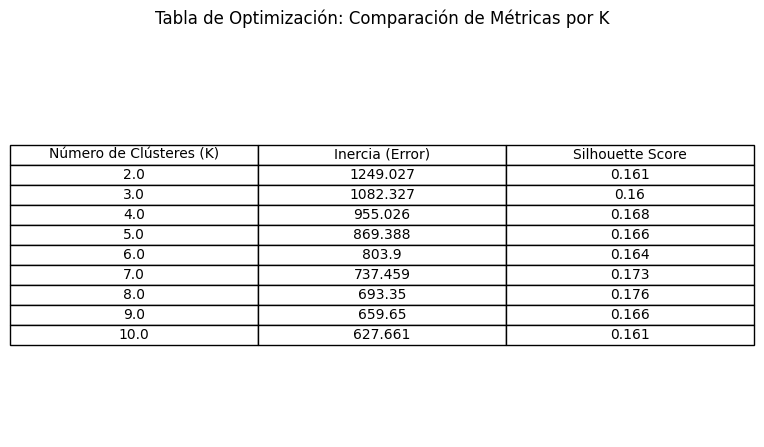

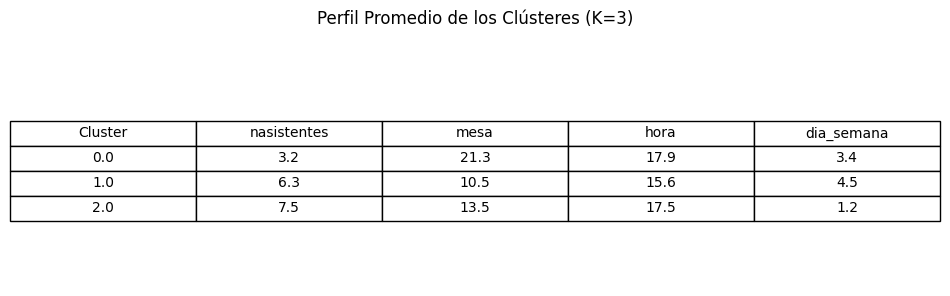

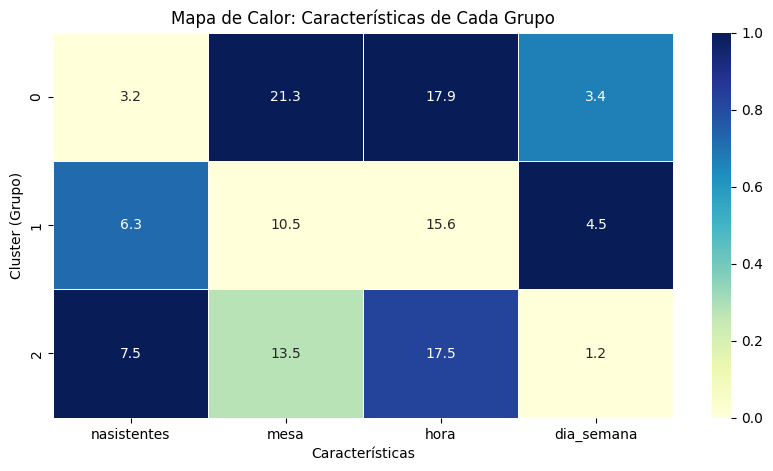

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

optimization_data = {
    'Número de Clústeres (K)': list(range(2, 11)),
    'Inercia (Error)': inertia,
    'Silhouette Score': silhouette_scores
}

opt_df = pd.DataFrame(optimization_data)

fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('tight')
ax.axis('off')
tabla_opt = ax.table(cellText=opt_df.values.round(3),
                     colLabels=opt_df.columns,
                     cellLoc='center',
                     loc='center')
tabla_opt.auto_set_font_size(False)
tabla_opt.set_fontsize(10)
tabla_opt.scale(1.2, 1.2)
plt.title('Tabla de Optimización: Comparación de Métricas por K', y=1.05)
plt.savefig('tabla_optimizacion.png', bbox_inches='tight', dpi=300)
plt.show()

perfil_df = df.groupby('Cluster')[['nasistentes', 'mesa', 'hora', 'dia_semana']].mean().round(1)
perfil_df = perfil_df.reset_index()

fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')
tabla_perfil = ax.table(cellText=perfil_df.values,
                        colLabels=perfil_df.columns,
                        cellLoc='center',
                        loc='center')
tabla_perfil.auto_set_font_size(False)
tabla_perfil.set_fontsize(10)
tabla_perfil.scale(1.2, 1.5)
plt.title(f'Perfil Promedio de los Clústeres (K={k_optimo})', y=1.1)
plt.savefig('tabla_perfil_cluster.png', bbox_inches='tight', dpi=300)
plt.show()

perfil_normalizado = (perfil_df.set_index('Cluster') - perfil_df.set_index('Cluster').min()) / (perfil_df.set_index('Cluster').max() - perfil_df.set_index('Cluster').min())

plt.figure(figsize=(10, 5))
sns.heatmap(perfil_normalizado, annot=perfil_df.set_index('Cluster'), fmt='.1f', cmap='YlGnBu', linewidths=.5)
plt.title('Mapa de Calor: Características de Cada Grupo')
plt.ylabel('Cluster (Grupo)')
plt.xlabel('Características')
plt.savefig('heatmap_perfil.png', bbox_inches='tight', dpi=300)
plt.show()